# This notebook shows how to download and plot GOES data.

In [1]:
# Import required libraries.
%pylab inline
from matplotlib import pyplot as plt
import datetime
from davitpy import gme #This is the DavitPy GeoMagnetic Environment module

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define the start time, end time, and which GOES Satellite to use.
# Make sure the satellite is available for your particular interval period.
# Data will be downloaded directly from NOAA at
# ftp://satdat.ngdc.noaa.gov/sem/goes/data/new_avg/

sTime       = datetime.datetime(2014,5,21)
eTime       = datetime.datetime(2014,5,24)
sat_nr      = 15

In [3]:
# This routine will download the data from NOAA and populate a dictionary containing
# metadata and a dataframe with the GOES data data.
# This routine downloads the 1-min Avg X-Xray flux data for two bands
# (0.05-0.4 nm and 0.1-0.8 nm).

goes_data   = gme.sat.read_goes(sTime,eTime,sat_nr)

Using locally cached file: /tmp/sd/g15_xrs_1m_20140501_20140531.nc


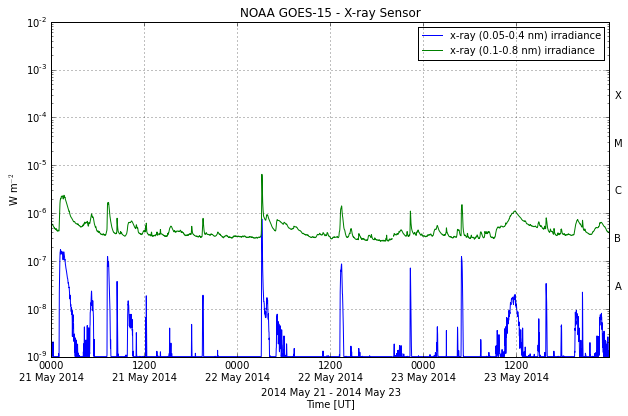

In [4]:
# This routine will use the dictionary format provided above to plot the GOES data.

fig         = gme.sat.goes_plot(goes_data)

# Finding and Plotting Large Flares

In [5]:
#Load in a large amount of GOES data...
sTime       = datetime.datetime(2014,1,1)
eTime       = datetime.datetime(2014,6,30)
sat_nr      = 15
goes_data   = gme.sat.read_goes(sTime,eTime,sat_nr)

Using locally cached file: /tmp/sd/g15_xrs_1m_20140101_20140131.nc
Using locally cached file: /tmp/sd/g15_xrs_1m_20140201_20140228.nc
Using locally cached file: /tmp/sd/g15_xrs_1m_20140301_20140331.nc
Using locally cached file: /tmp/sd/g15_xrs_1m_20140401_20140430.nc
Using locally cached file: /tmp/sd/g15_xrs_1m_20140501_20140531.nc
Using locally cached file: /tmp/sd/g15_xrs_1m_20140601_20140630.nc


In [6]:
#Find all of the X-Class flares in that time period (using 60-minute windowing)
flares      = gme.sat.find_flares(goes_data,min_class='X1',window_minutes=60)
flares

,B_AVG,class
2014-01-07 18:32:00,0.000125,X1.2
2014-02-25 00:49:00,0.000497,X5.0
2014-03-29 17:48:00,0.000101,X1.0
2014-04-25 00:27:00,0.000139,X1.4
2014-06-10 11:42:00,0.000222,X2.2
2014-06-10 12:52:00,0.000155,X1.5
2014-06-11 09:06:00,0.000100,X1.0


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


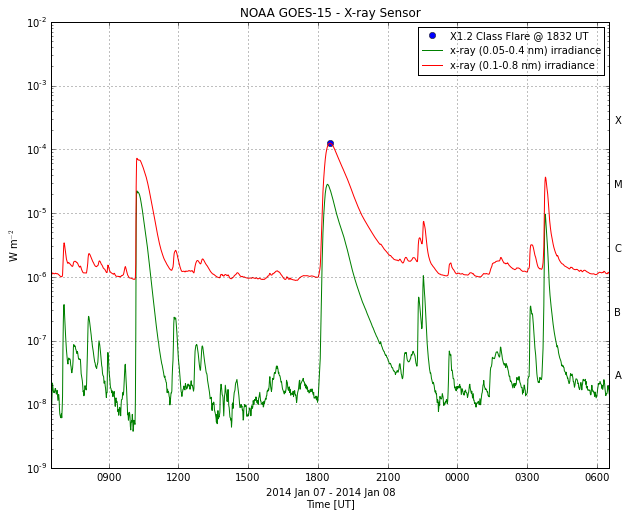

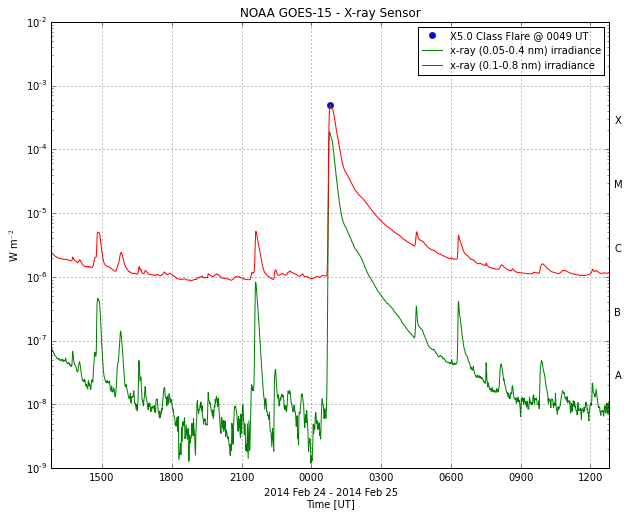

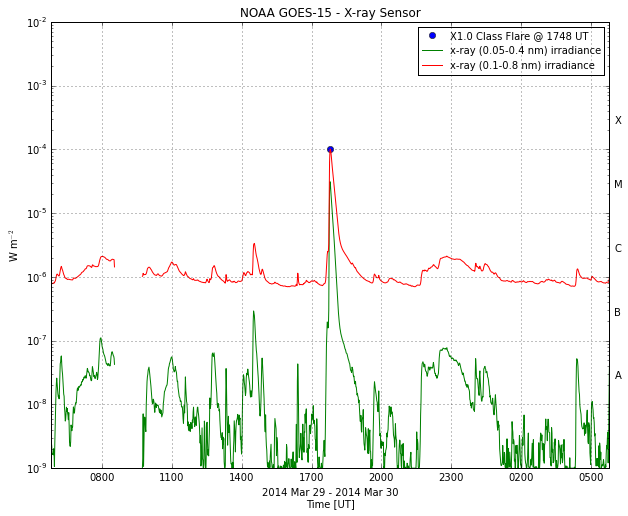

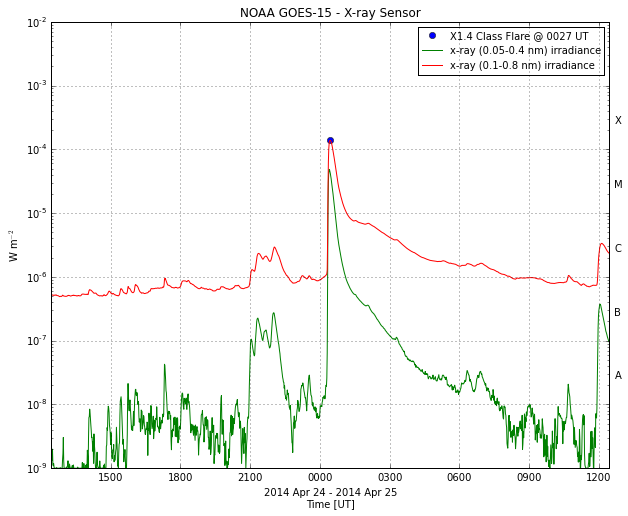

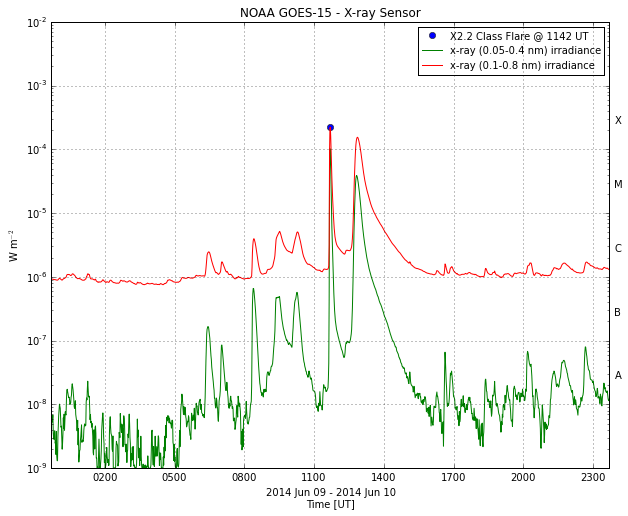

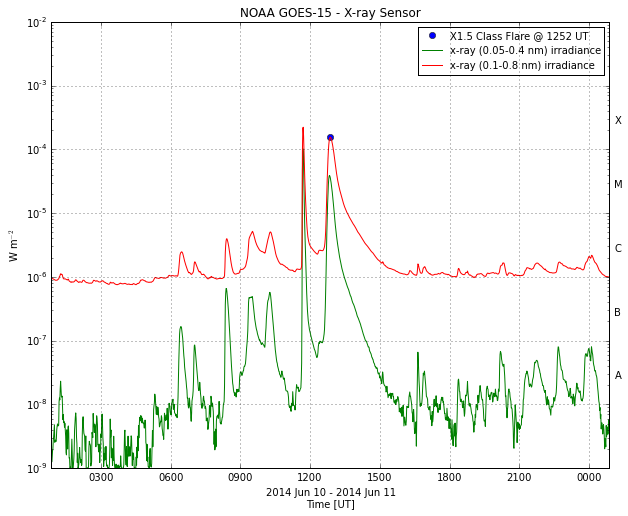

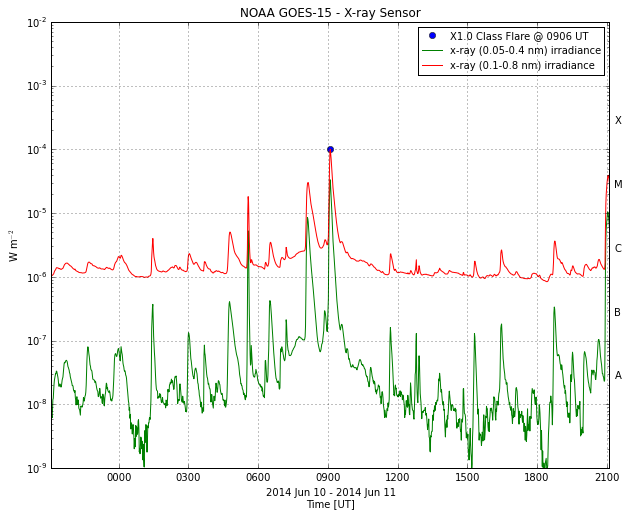

In [7]:
#Now create a plot for each flare.
for key,flare in flares.iterrows():
    #Create the figure and axis.
    fig     = plt.figure(figsize=(10,8))
    ax      = fig.add_subplot(111)
    
    #Label and plot just the flare max.
    label   = '{0} Class Flare @ {1}'.format(flare['class'],key.strftime('%H%M UT'))
    ax.plot(key,flare['B_AVG'],'o',label=label)
    
    #Now plot the GOES data around the flare.
    plot_sTime  = key - datetime.timedelta(hours=12)
    plot_eTime  = key + datetime.timedelta(hours=12)
    gme.sat.goes_plot(goes_data,ax=ax,sTime=plot_sTime,eTime=plot_eTime)
    fig.show()